In [136]:
import os
import pandas as pd 


submissions_path = "./input"
all_files = os.listdir(submissions_path)

outs = [pd.read_csv(os.path.join(submissions_path, f), index_col=0)\
        for f in all_files]

if outs[0].index.isnull().any():
    outs = outs[1:]
    
outs_name = [ f.split('.')[0] for f in all_files]
if "" in outs_name:
    outs_name.remove("")

In [137]:
concat_df = pd.concat(outs, axis=1)
cols = outs_name
concat_df.columns = cols
cols

['gpari', 'rgf_submit', 'XGBoost CV_284_XGB']

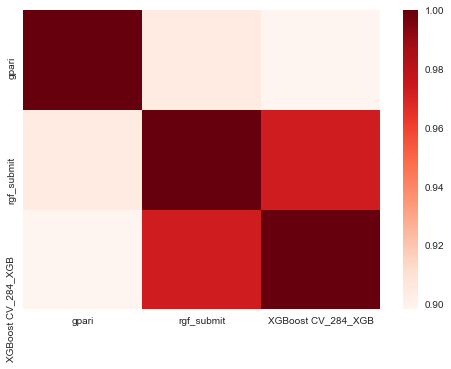

In [138]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(concat_df.corr(),cmap="Reds")
plt.show()

In [139]:
concat_df["target"] = (concat_df.rank() / concat_df.shape[0]).mean(axis=1)
concat_df.drop(cols, axis=1, inplace=True)

# Write the output
concat_df.to_csv("./all_stacked_by_rank.csv")